In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Element-based formula of [Jacobi method](https://en.wikipedia.org/wiki/Jacobi_method) 

$$ x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j \ne i} a_{ij} x_j^{(k)} \right), \quad i = 1, 2, \ldots, n $$


Element-based formula of Gauß Seidel

$$ x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)} \right), \quad i = 1, 2, \ldots, n $$

We can also express the two sums as $ \sum_{j\neq i} a_{ij} x_j $ with $x$ is part old vector, part new vector. We only need one storage vector. I dont implement this because then i have no stopping condition.



In [ ]:
def jacobi_iteration(A, b, x_0, x_sol, max_iterations = 1000, tol = 1e-10):
    n = A.shape[0]
    x = x_0
    errors = []
    for iter_count in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            sigma = A[i, :i] @ x[:i] + A[i, i+1:] @ x[i+1:]
            x_new[i] = (1 / A[i, i]) * (b[i] - sigma)
        
        errors.append(np.linalg.norm(x_sol - x_new))
        # in real life we wouldnt have x_sol, so we check against the previous x
        if np.allclose(x, x_new, atol=tol, rtol=0):
            print(f"Converged after {iter_count} iterations.")
            return x_new, errors
        
        x = x_new
    
    print("Maximum iterations reached without convergence.")
    return x

In [ ]:
def gauss_seidel_iteration(A, b, x_0, x_sol, max_iterations = 1000, tol = 1e-10):
    n = A.shape[0]
    x = x_0
    errors = []
    for iter_count in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            # Note that the x_new here is the only difference to jacobi_iteration
            sigma = A[i, :i] @ x_new[:i] + A[i, i+1:] @ x[i+1:]
            x_new[i] = (1 / A[i, i]) * (b[i] - sigma)
        
        errors.append(np.linalg.norm(x_sol - x_new))
        # in real life we wouldnt have x_sol, so we check against the previous x
        if np.allclose(x, x_new, atol=tol, rtol=0):
            print(f"Converged after {iter_count} iterations.")
            return x_new, errors
        
        x = x_new
    print("Maximum iterations reached without convergence.")
    return x

In [4]:
def generate_matrix(n, spectral_gap=5):
    A = np.random.rand(n, n)
    rowsums = A.sum(axis=1)
    A = A + spectral_gap * np.diag(rowsums)
    return A

In [7]:
n = 10
A = generate_matrix(n, spectral_gap=10)
x_sol = np.random.rand(n)
b = A @ x_sol
x_0 = np.random.rand(n)
cond = np.linalg.cond(A)
print(f"Condition number of A: {cond}")
x_jacobi, errors_jacobi = jacobi_iteration(A, b, x_0, x_sol, tol=1e-14)
x_gauss_seidel, errors_gauss_seidel = gauss_seidel_iteration(A, b, x_0, x_sol, tol=1e-14)

Condition number of A: 1.9737323089400496
Converged after 13 iterations.
Converged after 8 iterations.


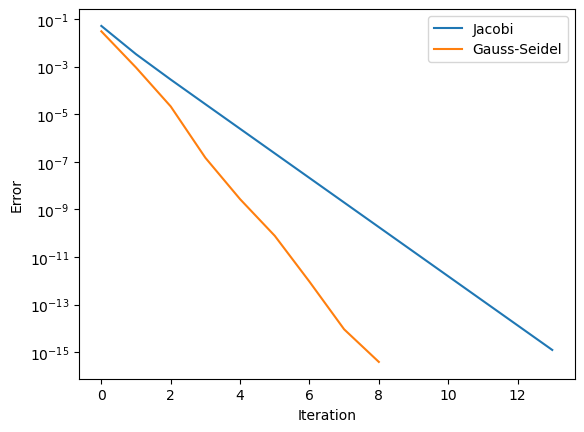

In [8]:
plt.plot(errors_jacobi, label='Jacobi')
plt.plot(errors_gauss_seidel, label='Gauss-Seidel')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()

Note that Gauss-Seidel converges much faster, especially for worse conditioned matrices